In [57]:
import warnings
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os

In [58]:
# filepath to local data 
filedir = ('./Archive')

# check to make sure Archive exists
if not os.path.exists(filedir):
    raise Exception('The /Archive/ directory does not exist. Please create it by unzipping Archive.zip.')

# check to make sure Archive contains CSVs
csv_files = [f for f in glob.glob(os.path.join(filedir, '*.csv'))]
if len(csv_files) < 11:
    raise Exception('The /Archive/ directory has fewer than 11 CSVs. Please make sure all CSV files (2009-2019) are copied into it.')


In [59]:
# read each year into its own dataframe. 
# ignore encoding errors caused by special characters in the data, to keep things simple.
year_2009 = pd.read_csv(os.path.join(filedir, '2009.csv'), encoding='utf8', encoding_errors='ignore')
year_2010 = pd.read_csv(os.path.join(filedir, '2010.csv'), encoding='utf8', encoding_errors='ignore')
year_2011 = pd.read_csv(os.path.join(filedir, '2011.csv'), encoding='utf8', encoding_errors='ignore')
year_2012 = pd.read_csv(os.path.join(filedir, '2012.csv'), encoding='utf8', encoding_errors='ignore')
year_2013 = pd.read_csv(os.path.join(filedir, '2013.csv'), encoding='utf8', encoding_errors='ignore')
year_2014 = pd.read_csv(os.path.join(filedir, '2014.csv'), encoding='utf8', encoding_errors='ignore')
year_2015 = pd.read_csv(os.path.join(filedir, '2015.csv'), encoding='utf8', encoding_errors='ignore')
year_2016 = pd.read_csv(os.path.join(filedir, '2016.csv'), encoding='utf8', encoding_errors='ignore')
year_2017 = pd.read_csv(os.path.join(filedir, '2017.csv'), encoding='utf8', encoding_errors='ignore')
year_2018 = pd.read_csv(os.path.join(filedir, '2018.csv'), encoding='utf8', encoding_errors='ignore')
year_2019 = pd.read_csv(os.path.join(filedir, '2019.csv'), encoding='utf8', encoding_errors='ignore')

In [60]:
# combine all 2009-2019 CSB complaint files into one table
total = pd.concat([
	year_2009,
	year_2010,
	year_2011,
	year_2012,
	year_2013,
	year_2014,
	year_2015,
	year_2016,
	year_2017,
	year_2018,
	year_2019,
])


In [61]:
# assuring the data got read into the dataframe; checking out the data
total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1159888 entries, 0 to 4919
Data columns (total 19 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   CALLERTYPE       604212 non-null   object 
 1   DATECANCELLED    31362 non-null    object 
 2   DATEINVTDONE     1114116 non-null  object 
 3   DATETIMECLOSED   1100744 non-null  object 
 4   DATETIMEINIT     1159888 non-null  object 
 5   DESCRIPTION      1159880 non-null  object 
 6   NEIGHBORHOOD     1098534 non-null  object 
 7   PRJCOMPLETEDATE  1144802 non-null  object 
 8   PROBADDRESS      1156310 non-null  object 
 9   PROBADDTYPE      1159888 non-null  object 
 10  PROBCITY         298659 non-null   object 
 11  PROBLEMCODE      1159888 non-null  object 
 12  PROBZIP          276513 non-null   object 
 13  REQUESTID        1159888 non-null  int64  
 14  SRX              1126255 non-null  float64
 15  SRY              1126259 non-null  float64
 16  STATUS           1159732 n

In [62]:
# here are the problem codes we are interested in
playground = ['Playground Equipment']
misc_parks = ['Misc-Parks Div']
trash = ['Trash in the Park']
potty = ['Park Restrooms']
fields = ['Athletic Fields']
grass = ['High Grass in Park']
sewer = ['Park Sewer Problem']
picnic = ['Clean Picnic Tables']

In [63]:
# total playground equipment complaints 2009-2019
playground_total = total.loc[total['PROBLEMCODE'].isin(playground)]
playground_total['DATETIMEINIT'].count()

410

In [64]:
# total playground equipment complaints 2009-2019 sorted by year
playground_total['YEAR'] = pd.DatetimeIndex(playground_total['DATETIMEINIT']).year
x = playground_total['YEAR'].groupby(playground_total.YEAR).agg('count')
print(x)

YEAR
2009    28
2010    28
2011    36
2012    35
2013    48
2014    36
2015    27
2016    55
2017    65
2018    50
2019     2
Name: YEAR, dtype: int64


Text(0, 0.5, 'Number of complaints')

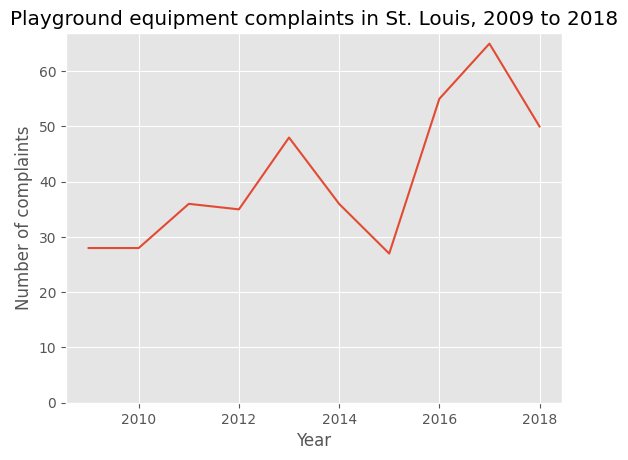

In [65]:
# playground equipment complaints 2009-2018
# NOTE: Since 2019 data is only through April, it is excluded from the graph
plt.rcParams['axes.formatter.useoffset'] = False
plt.style.use('ggplot')
f, ax = plt.subplots(1)
mask = x > 2
ax.plot(x[mask])
ax.set_ylim(ymin=0)
plt.title("Playground equipment complaints in St. Louis, 2009 to 2018")
plt.xlabel("Year")
plt.ylabel("Number of complaints")

In [66]:
# filtering the 2018 dataframe down to each specific problem code
misc_parks_2018 = year_2018.loc[year_2018['PROBLEMCODE'].isin(misc_parks)]
misc_parks_2018['DATETIMEINIT'].count()

107

In [67]:
trash_2018 = year_2018.loc[year_2018['PROBLEMCODE'].isin(trash)]
trash_2018['DATETIMEINIT'].count()

106

In [68]:
potty_2018 = year_2018.loc[year_2018['PROBLEMCODE'].isin(potty)]
a = potty_2018['DATETIMEINIT'].count()
print(a)

24


In [69]:
fields_2018 = year_2018.loc[year_2018['PROBLEMCODE'].isin(fields)]
b = fields_2018['DATETIMEINIT'].count()
print(b)

18


In [70]:
grass_2018 = year_2018.loc[year_2018['PROBLEMCODE'].isin(grass)]
c = grass_2018['DATETIMEINIT'].count()
print(c)

171


In [71]:
sewer_2018 = year_2018.loc[year_2018['PROBLEMCODE'].isin(sewer)]
d = sewer_2018['DATETIMEINIT'].count()
print(d)

9


In [72]:
picnic_2018 = year_2018.loc[year_2018['PROBLEMCODE'].isin(picnic)]
e = picnic_2018['DATETIMEINIT'].count()
print(e)

4


In [73]:
all_other_park_complaints = a + b + c + d + e
print(all_other_park_complaints)

226
